In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sklearn as skl
from scipy.io import loadmat
import pandas as pd
from sklearn.preprocessing import scale
from sklearn import cross_validation
from sklearn.preprocessing import scale
from sklearn.cross_decomposition import PLSRegression

C:\Users\Nikan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = np.loadtxt("breast-cancer-wisconsin.data.csv", delimiter=",")

In [3]:
for i in range(len(data[:,10])):
    if data[i,10] == 2:
        data[i,10] = 0
    elif data[i,10] == 4:
        data[i,10] = 1
    
X = data[:,1:10]
Y = data[:,10]

In [4]:
PLS = PLSRegression(n_components = 2, max_iter = 1000)

xSc, ySc = PLS.fit_transform(scale(X),scale(Y)) #xSc not the same as PLS.x_scores_ ?
xScores2 = PLS.x_scores_
r2 = PLS.score(scale(X),scale(Y))

In [5]:
r2

0.83974134422938906

In [6]:
#from sklearn.decomposition import PCA
xloadings = PLS.x_loadings_
yloadings = PLS.y_loadings_

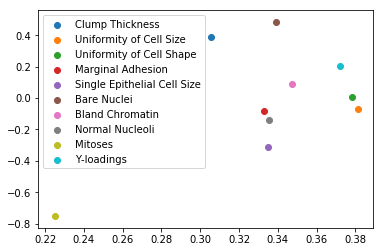

In [7]:
for i in range(len(xloadings[:,0])):
    plt.scatter(xloadings[i,0], xloadings[i,1],)
plt.scatter(yloadings[:,0], yloadings[:,1],)
plt.legend(['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Y-loadings'])
plt.show()

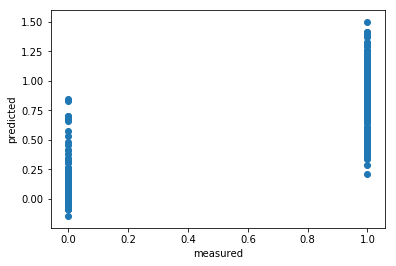

0.80358757504426537

In [14]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score
loo = LeaveOneOut()
Xs=scale(X)
Ys=scale(Y)
model = np.zeros(683)
for train, test in loo.split(X):
    
    xSc, ySc = PLS.fit_transform((Xs[train]),(Ys[train])) #xSc not the same as PLS.x_scores_ ?

    model[test] = PLS.predict(Xs[test])
    
#model_real = model*np.std(model)+np.mean(model)
plt.xlabel('measured')
plt.ylabel('predicted')
plt.scatter(Y,(model))
plt.show()
r2_score((model),(Ys))

In [15]:
model

array([  1.11608998e-01,   7.00603921e-01,   7.95585723e-02,
         6.56110661e-01,   1.07469913e-01,   1.31967138e+00,
         3.02775653e-01,   3.13137892e-02,  -8.18390911e-02,
         7.12133447e-02,  -3.62588538e-02,  -1.59737216e-02,
         3.66013985e-01,   4.76049859e-02,   9.79795265e-01,
         4.89642124e-01,   5.19210162e-02,   7.75967265e-02,
         9.59835714e-01,   1.45733465e-01,   7.95872681e-01,
         9.81631666e-01,   1.79740872e-02,  -2.42854637e-02,
         5.08926838e-01,   2.53403959e-02,   8.59187958e-02,
        -1.59737216e-02,  -3.24116834e-02,   6.04231718e-03,
         9.70124693e-03,   8.99208805e-01,   2.46160259e-02,
         3.95713075e-02,  -1.59737216e-02,   1.05823218e+00,
         2.57882681e-01,   8.01795643e-01,   5.83366335e-01,
         5.90137287e-01,   1.03601700e+00,   4.49341201e-01,
         1.03865805e+00,  -5.99811994e-02,   7.77809876e-01,
        -4.99742132e-02,   1.07469913e-01,   8.31974528e-01,
         4.68069389e-01,

In [10]:
Y

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,
        1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,
        0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,
        0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
        1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1